<a href="https://colab.research.google.com/github/lazychoi/dartUsingPython/blob/master/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%A0%84%EC%9E%90%EA%B3%B5%EC%8B%9C_%ED%99%9C%EC%9A%A9%5D%EA%B5%AC%EA%B8%80_%EA%B2%80%EC%83%89_%EC%B9%B4%EC%9A%B4%ED%84%B0_%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# requests 기본 실습 - 구글 검색 카운터 가져오기

* 서버에서 HTML or XML 파일 가져오기: **[requests](https://requests.readthedocs.io/en/master/)**
* 파일에서 원하는 데이터 가져오기: **[Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**




In [0]:
import requests
r = requests.get('http://www.google.co.kr/search?q=코로나19')
r

<Response [200]>

'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>코로나19 - Google Search</title><script nonce="U6KVtw58dDxqyRRScthFpg==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google
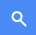

In [0]:
r.text

b'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>\xc4\xda\xb7\xce\xb3\xaa19 - Google Search</title><script nonce="U6KVtw58dDxqyRRScthFpg==">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}windo
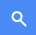

In [0]:
r.content #바이너리로 가져옴

## 2-2. headers를 지정해야 하는 경우

구글 검색 후 결과개수를 출력하는 코드(구글개발자도구를 사용해 id가 mBMHK임을 찾음)

In [0]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.google.co.kr/search?q=코로나19'
r = requests.get(url)

soup = BeautifulSoup(r.text)
div = soup.find(id='mBMHK')
div

위 코드는 아무런 결과를 출력하지 않는다.

아래처럼 headers에 user-agent를 추가하면 결과를 출력한다.

user-agent는 개발자도구 > Network > 가장 위 항목 클릭 후 우측의 'Request Headers'에 있음.  
accept-language: ko 를 넣으면 결과가 한글로 표시됨.


In [0]:
import requests
from bs4 import BeautifulSoup

headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.116 Safari/537.36',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7'
}

url = 'http://www.google.co.kr/search?q=코로나19'
r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.text)
div = soup.find(id='mBMHK')
div

<div id="mBMHK">검색결과 약 118,000,000개<nobr> (0.35초) </nobr></div>

In [0]:
div.text.split()

['검색결과', '약', '118,000,000개', '(0.35초)']

In [0]:
int(div.text.split()[2][:-1].replace(',','')) # 끝의 '개'와 숫자 사이의 쉼표 없애고 숫자로 변환

118000000